<a href="https://colab.research.google.com/github/emadfrj/Sentimental-Analysis-of-Reviews/blob/main/Review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing the reviews for British Airways
Initially, the data is extracted from the CSV file and undergoes a cleaning process. The determination of customer satisfaction relies on the "recommended" field, indicating whether the customer recommended the flight. Therefore, words with polarized sentiments, such as "good" or "poor," are eliminated from the text, considering that sentiment analysis is already done based on recommendation status. Following this, the reviews are segregated into two datasets based on recommended field (satisfied and unsatisfied customers). Ultimately, word clouds for each dataset are generated to pinpoint the positive and negative aspects of the Airline.

## get data from CSV file

In [1]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'https://raw.githubusercontent.com/emadfrj/Databases/main/BritishAirwayReviews.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

## Remove missing data

In [2]:
df.dropna(subset=['Text'], inplace=True)
df.dropna(subset=['Recommended'], inplace=True)

## clean the text field

In [3]:
# make all words lower case
df['Text'] = df['Text'].str.lower()
# remove excesive spaces
df['Text'] = df['Text'].str.strip()
# Remove the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
# Removing the word 'verified' from the begining of texts
df['Text'] = df['Text'].apply(lambda x: x.split('verified', 1)[1] if 'verified' in x and x.find('verified') < 10 else x)
# remove custom stop words
custom_stopwords = ['flight','fly','flying','ba','british airway', 'british airways','airway','airways','british','airline']
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in custom_stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Remove the polarized words

In [5]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# download VADAR
nltk.download('vader_lexicon')
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

positive_threshold = 0.2
negative_threshold = -0.2
# Function to remove positive and negative words from text
def remove_positive_negative_words(text):
    words = text.split()
    cleaned_words = [word for word in words if sid.polarity_scores(word)['compound'] < positive_threshold and sid.polarity_scores(word)['compound'] > negative_threshold]
    return ' '.join(cleaned_words)

# Apply the function to the 'Text' column and create Neutral_Text field
df['Neutral_Text'] = df['Text'].apply(remove_positive_negative_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Divide dataset to satisfied and unsatisfied customers
Based on whether they have recommended the flight or not

In [6]:
#satisfied customers
Positive_df = df[df['Recommended'] == 1]
#combine all text fields into a string
all_text_Positive = ' '.join(Positive_df['Neutral_Text'].astype(str))

#unsatisfied customers
Negative_df = df[df['Recommended'] == 0]
all_text_Negative = ' '.join(Negative_df['Neutral_Text'].astype(str))


## Plot word cloud for satisfied customers

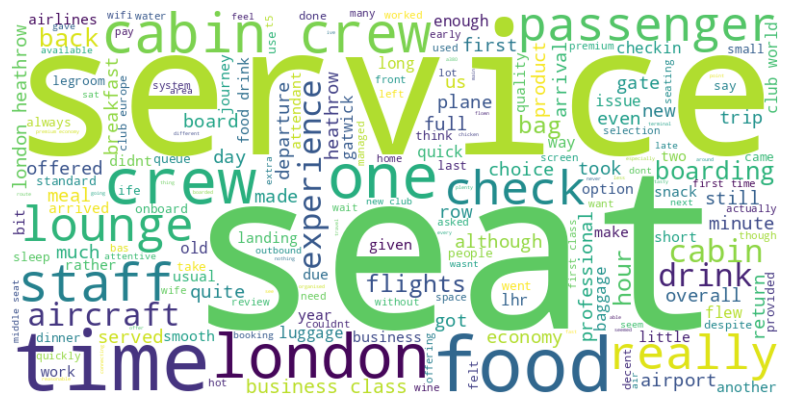

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_Positive)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plot word cloud for unsatisfied customers

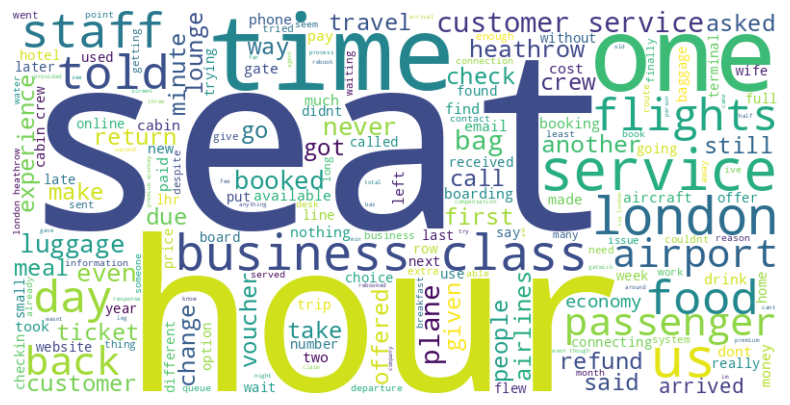

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_Negative)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## count the number of satisfied and unsatisfied customers

In [9]:
satisfied_customers = (df['Recommended'] == 1).sum()
unsatisfied_customers = (df['Recommended'] == 0).sum()


print("Number of satisfied customers:",satisfied_customers)
print("Number of unsatisfied customers:",unsatisfied_customers)


Number of satisfied customers: 335
Number of unsatisfied customers: 665
